## Importing Libraries

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
from statistics import harmonic_mean

## Original Image

(-0.5, 463.5, 447.5, -0.5)

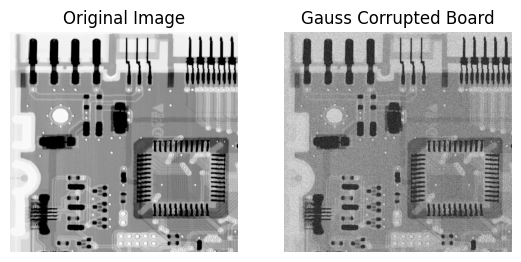

In [21]:
# circuit board with gaussian noise
board = cv2.imread('board.tif')
board = cv2.cvtColor(board, cv2.COLOR_BGR2GRAY)

board_gaussnoise = cv2.imread('board_gauss.tif')
board_gaussnoise = cv2.cvtColor(board_gaussnoise, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10), constrained_layout=False)

plt.subplot(1, 3, 1)
plt.imshow(board, 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(board_gaussnoise, 'gray')
plt.title('Gauss Corrupted Board')
plt.axis('off')

## Arithmetic Mean Filter

(<Axes: title={'center': 'Arithmetic Mean Filter'}>,
 Text(0.5, 1.0, 'Arithmetic Mean Filter'),
 (-0.5, 463.5, 447.5, -0.5))

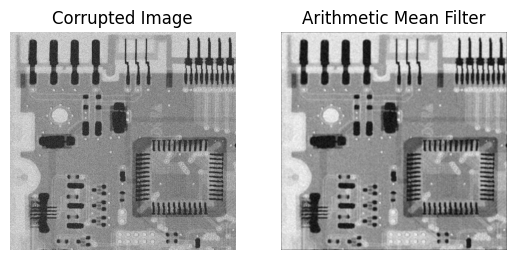

In [28]:
def arithmeticMean(input_image, windowSize = 3):

  # allocating memory for output image
  output = np.zeros((input_image.shape[0], input_image.shape[1]))

  # padding the input image
  input_padded = np.pad(input_image, (1, 1))

  # iterating through the image
  for i in range(input_padded.shape[0] - (windowSize - 1)):
    for j in range(input_padded.shape[1] - (windowSize - 1)):
      output[i, j] = np.mean(input_padded[i: i + windowSize, j: j + windowSize])

  return output

# calling the function
board_arithmeticMean = arithmeticMean(board_gaussnoise, 3)
plt.subplot(1, 2, 1), plt.imshow(board_gaussnoise, 'gray'), plt.title('Corrupted Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(board_arithmeticMean, 'gray'), plt.title('Arithmetic Mean Filter'), plt.axis('off')

## Geometric Mean Filter

(<Axes: title={'center': 'Geometric Mean Filter'}>,
 Text(0.5, 1.0, 'Geometric Mean Filter'),
 (-0.5, 463.5, 447.5, -0.5))

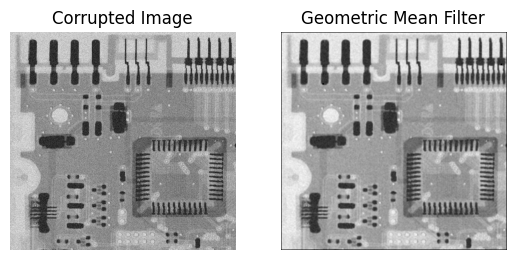

In [39]:
def geometricMean(input_image, windowSize = 3):

  # allocating memory for the output image
  output = np.zeros((input_image.shape[0], input_image.shape[1]))

  # padding the input image
  input_padded = np.pad(input_image, (1, 1))

  # iterating through the image
  for i in range(input_padded.shape[0] - (windowSize - 1)):
    for j in range(input_padded.shape[1] - (windowSize - 1)):
      output[i, j] = gmean(input_padded[i: i + windowSize, j: j + windowSize].ravel())

  return output

# calling the function
board_geometricMean = geometricMean(board_gaussnoise, 3)
plt.subplot(1, 2, 1), plt.imshow(board_gaussnoise, 'gray'), plt.title('Corrupted Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(board_geometricMean, 'gray'), plt.title('Geometric Mean Filter'), plt.axis('off')

## Harmonic Mean Filter

/usr/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in true_divide
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))


(<Axes: title={'center': 'Harmonic Mean Filter'}>,
 Text(0.5, 1.0, 'Harmonic Mean Filter'),
 (-0.5, 463.5, 447.5, -0.5))

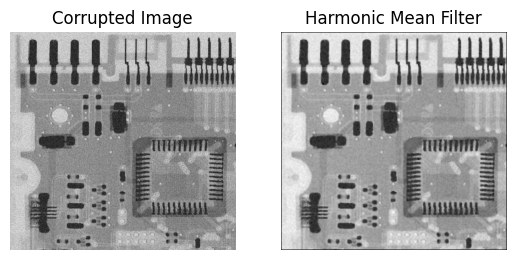

In [41]:
def harmonicMean(input_image, windowSize = 3):

  # allocating memory for the output image
  output = np.zeros((input_image.shape[0], input_image.shape[1]))

  # padding the input image
  input_padded = np.pad(input_image, (1, 1))

  # iterating through the image
  for i in range(input_padded.shape[0] - (windowSize - 1)):
    for j in range(input_padded.shape[1] - (windowSize - 1)):
      output[i, j] = harmonic_mean(input_padded[i: i + windowSize, j: j + windowSize].ravel())

  return output

# calling the function
board_harmonicMean = harmonicMean(board_gaussnoise, 3)
plt.subplot(1, 2, 1), plt.imshow(board_gaussnoise, 'gray'), plt.title('Corrupted Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(board_harmonicMean, 'gray'), plt.title('Harmonic Mean Filter'), plt.axis('off')